In [1]:
# Ignore this part
import os
os.listdir()

['.config', 'Life_Expectancy_Data.csv', 'drive', 'sample_data']

# IDA assignment.
- Student ID: 2578281, Name: Noboru Kanazawa
- Email: NXK381@student.bham.ac.uk

# Data Description:
- Step into the world of global health and demographics with our rich and comprehensive dataset. It's your passport to unraveling the secrets of life expectancy and understanding the pulse of population health. Dive into a treasure trove of valuable information for public health research and epidemiology, where each column tells a unique story about a nation's health journey.
- Reference: https://www.kaggle.com/datasets/uom190346a/health-and-demographics-dataset/

# Discover the Gems in Our Dataset:

#### indexes
- Country: Explore the global tapestry with data from diverse nations.
- Year: Unlock the passage of time and its impact on health trends.
- Status: Understand the development status, whether "Developed" or "Developing," that shapes the course of health.
- Population: Witness the ebb and flow of a nation's populace.

#### metrics
- Life Expectancy: Peer into the crystal ball of population health, revealing how long people can expect to live.
- Adult Mortality: Gauge the probabilities of survival between ages 15 and 60 per 1,000 population.
- Infant Deaths: Delve into infant health with the number of infant deaths per 1,000 live births.
- Under-Five Deaths: Shine a spotlight on child mortality with the number of deaths under age five per 1,000 live births.
- Thinness 1-19 Years: Explore the prevalence of thinness among children and adolescents aged 1-19.
- Thinness 5-9 Years: Zoom in on thinness among children aged 5-9.

#### Lifestyle
- Alcohol: Raise a glass to insights on average alcohol consumption in liters per capita.
- BMI: Step onto the scales of national health with the average Body Mass Index.

#### Government expenditure
- Percentage Expenditure: Unearth health expenditure as a percentage of a country's GDP.
- Total Expenditure: Track the total health expenditure as a percentage of GDP.

#### Diseases
- Hepatitis B: Measure immunization coverage for Hepatitis B.
- Measles: Examine the impact of this preventable disease with the number of reported cases per 1,000 population.
- Polio: Inspect immunization coverage for Polio.
- Diphtheria: Assess immunization coverage for Diphtheria.
- HIV/AIDS: Witness the prevalence of HIV/AIDS as a percentage of the population.

#### Country wealth
- GDP: Follow the financial pulse of a nation with Gross Domestic Product data.
- Income Composition of Resources: Decode the composite index reflecting income distribution and resource access.
- Schooling: Measure the gift of knowledge with data on average years of schooling.

# Labelling target and objective
Use below features for investigating the data aiming to find the key factors or propose a way to improve the situation.
- Life expectancy
- Child mortality


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
source_data = pd.read_csv("Life_Expectancy_Data.csv")

### Preprocessing data

In [4]:
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [5]:
# No null data in dataset
# check year data for all country, try to make sure every country has the same measurement span
source_data.groupby("Country").count()["Year"]

Country
Afghanistan    16
Albania        16
Algeria        11
Angola          8
Argentina      13
               ..
Uruguay        15
Uzbekistan     13
Vanuatu        15
Zambia         10
Zimbabwe       15
Name: Year, Length: 133, dtype: int64

In [6]:
# To remove the fluctuation of measurement span, we consider the mean value of each features
data_mean_by_country = source_data.groupby("Country").mean()

<ipython-input-6-d0d5402e266f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_mean_by_country = source_data.groupby("Country").mean()


In [7]:
# Keep "Status" feature as a Series
status_feature = source_data[["Country", "Status"]].drop_duplicates().set_index("Country")

In [8]:
# drop redundant data
data_mean_by_country_only_continuous = data_mean_by_country.drop(columns = ["Year"])

In [9]:
# check preprocessed data
data_mean_by_country_only_continuous.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000
mean,68.621623,172.835221,34.589928,4.330469,683.877018,76.932146,2140.888069,36.945578,47.598359,81.812176,5.944817,82.205861,1.997371,5536.085842,1.467970e+07,5.090827,5.122170,0.620556,11.893598
std,8.853716,100.897850,125.982422,3.749313,1367.263657,17.657076,7374.870591,15.725577,170.420659,15.615754,1.773229,16.154142,5.039435,9075.450471,5.346719e+07,4.338687,4.376404,0.170037,2.873939
min,48.425000,19.933333,0.000000,0.010000,5.046481,2.000000,0.000000,14.438462,0.000000,24.000000,1.070000,2.000000,0.100000,82.190242,2.790000e+02,0.100000,0.100000,0.155867,4.866667
25%,62.737500,110.333333,0.733333,1.055385,56.628121,65.923077,9.250000,19.300000,1.000000,73.357143,4.705000,72.500000,0.100000,727.212283,1.063396e+06,1.820000,1.886667,0.485000,10.123077
50%,71.146154,151.266667,3.266667,3.596667,211.139219,79.200000,168.400000,41.420000,4.000000,85.800000,5.959286,87.250000,0.106667,2119.726679,3.674746e+06,3.792857,3.823077,0.648533,12.140000
75%,74.209091,230.142857,23.000000,7.334444,551.082858,91.466667,1355.800000,49.753333,33.636364,95.200000,7.103333,95.266667,1.200000,5036.077329,1.204956e+07,7.506667,7.453846,0.741867,13.771429
max,83.440000,547.166667,1268.818182,13.497333,8722.748097,98.866667,67424.400000,68.886667,1681.818182,98.600000,11.850000,98.933333,34.666667,56727.492103,5.943872e+08,27.000000,27.818182,0.919250,19.985714


In [10]:
# the percentage expenditure shows irregular values.
# It is better to confirm the value to the stakeholder, but we drop this here.
data_mean_by_country_only_continuous.drop(columns="percentage expenditure", inplace=True)

## Labeling "Life expectancy" and "Child mortality"

In [11]:
# As "infant deaths" and "under-five deaths" are all related to child fatalities, ...
# ... they can be merged into one feature which can indicate the deficiency of child healthcare.
# Define a new feature called "Child mortality" by summing up two features.
data_mean_by_country_only_continuous["Child mortality"] = data_mean_by_country_only_continuous[["infant deaths", "under-five deaths "]].sum(axis=1)

<Axes: >

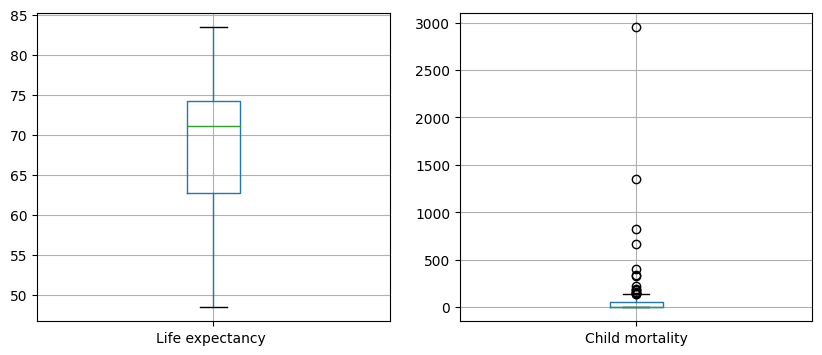

In [12]:
# check the boxplot of each feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

data_mean_by_country_only_continuous.boxplot(column=["Life expectancy "], ax=axes[0])
data_mean_by_country_only_continuous.boxplot(column=["Child mortality"], ax=axes[1])

In [13]:
# Since Life expectancy ranged between (48, 83) and mainly distributed among 62 to 74, then it makes sense to divide into 4 categories as follows.
# 0: Short-> under 60, 1:Medium -> between 60 and 70, 2:Long -> between 70 and 75, 3:Extremely Long -> over 75.
data_mean_by_country_only_continuous["Life expectancy cat"] = 0
data_mean_by_country_only_continuous.loc[data_mean_by_country_only_continuous["Life expectancy "]<60, "Life expectancy cat"] = 0
data_mean_by_country_only_continuous.loc[(data_mean_by_country_only_continuous["Life expectancy "]>=60) & (data_mean_by_country_only_continuous["Life expectancy "]<70), "Life expectancy cat"] = 1
data_mean_by_country_only_continuous.loc[(data_mean_by_country_only_continuous["Life expectancy "]>=70) & (data_mean_by_country_only_continuous["Life expectancy "]<75), "Life expectancy cat"] = 2
data_mean_by_country_only_continuous.loc[data_mean_by_country_only_continuous["Life expectancy "]>=75, "Life expectancy cat"] = 3

In [14]:
# Also, From the boxplot chart, it is obvious that "Deficiency in child healthcare" rarely happens when the mark is over 50.
# Therefore, we split into 2 categories. 0: normal -> less than 50, 1: abnormal -> over 50
data_mean_by_country_only_continuous["Child mortality cat"] = 0
data_mean_by_country_only_continuous.loc[data_mean_by_country_only_continuous["Child mortality"] < 50, "Child mortality cat"] = 0
data_mean_by_country_only_continuous.loc[data_mean_by_country_only_continuous["Child mortality"] >= 50, "Child mortality cat"] = 1

In [15]:
# In the end, we finalize inputs and labels
X = data_mean_by_country_only_continuous.drop(columns=["Life expectancy ", "Life expectancy cat", "under-five deaths ", "infant deaths",
                                                       "Child mortality", "Child mortality cat"])
labels = data_mean_by_country_only_continuous[["Life expectancy cat", "Child mortality cat"]]

### Start PCA with below flow
1. Standardize data - For all data points, subtract the mean and dividing with the variation with regard to each feature.
2. Get covariance matrix with the design matrix.
3. Obtain eigenvalues and eigenvectors of covariance matrix by conducting eigendecomposition.
4. Check the amount of explained variance with eigenvalues.
5. Visualization.  
 1. Investigate few prominet eigenvectors to gain the intuition of the variance in data.
 2. Project data points to subspace on the purpose of visualization and insights.

In [16]:
# Check for input data
X.head()

,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,
Afghanistan,269.062500,0.014375,64.562500,2362.250,15.518750,48.375000,8.252500,52.312500,0.10,340.015425,9.972260e+06,16.581250,15.581250,0.415375,8.212500
Albania,45.062500,4.848750,98.000000,53.375,49.068750,98.125000,5.945625,98.062500,0.10,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.137500
Algeria,102.818182,0.447273,76.454545,647.000,48.872727,93.181818,4.945455,93.363636,0.10,3261.289374,2.412474e+07,6.000000,5.890909,0.707182,13.163636
Angola,362.750000,7.620000,71.000000,3925.625,18.450000,70.875000,3.653750,64.000000,2.45,2935.762962,1.010785e+07,9.037500,8.925000,0.492875,9.475000
Argentina,100.384615,8.004615,80.307692,2.000,54.484615,94.461538,6.546154,93.692308,0.10,6932.546882,2.084745e+07,1.061538,0.930769,0.795769,16.630769


In [17]:
# Check for labels
labels.head()

,Life expectancy cat,Child mortality cat
Country,,
Afghanistan,0,1
Albania,3,0
Algeria,2,0
Angola,0,1
Argentina,3,0


In [18]:
# Standardization
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

# check standardized data
print(np.mean(X_, axis=0))
print(np.std(X_, axis=0))

[ 4.67462326e-17  1.33560665e-17  5.74310858e-16  1.33560665e-17
 -3.00511495e-16  5.67632825e-16 -2.63782313e-16 -6.34413157e-16
 -5.34242658e-17  6.01022991e-17  0.00000000e+00 -1.46916731e-16
  9.68314818e-17 -4.34072160e-16  3.43918711e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- It was confirmed that all features have 0 for mean, and 1 for standard deviation.

In [19]:
# Let's calculate covariance matrix
covariance_matrix = np.cov(X_, ddof = 1, rowvar = False)

# Try eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sorting eigenvectors with eigenvalues
sort_ind = np.argsort(eigenvalues)[::-1]

# utilize the index to sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[sort_ind]
sorted_eigenvectors = eigenvectors[:, sort_ind] # sort the columns as eigenvectors are stored column-wise

In [20]:
# check eigenvalues
df_eigenvalues = pd.DataFrame(sorted_eigenvalues, columns=["eigenvalues"])
df_eigenvalues

,eigenvalues
0,6.405333
1,1.976824
2,1.831950
3,1.364094
4,0.795241
5,0.744380
6,0.527075
7,0.396453
8,0.349226
9,0.183759


In [21]:
# check top3 eigenvectors
df_eigenvectors = pd.DataFrame(sorted_eigenvectors, columns=[f"eigenvector_{i}" for i in range(len(eigenvalues))])
df_eigenvectors.iloc[:, :3]

,eigenvector_0,eigenvector_1,eigenvector_2
0,0.252749,0.273666,0.202730
1,-0.284808,-0.078461,-0.061378
2,-0.190204,0.029150,0.578974
3,0.100112,-0.460473,-0.060943
4,-0.329100,0.063761,-0.193487
5,-0.283266,-0.147045,0.443071
6,-0.184105,0.144116,0.021160
7,-0.275759,-0.137620,0.470988
8,0.133347,0.246944,0.174049
9,-0.264746,-0.114730,-0.197268


In [22]:
# check if every eigenvector is orthonormal by calculating V*V.T
pca_orthogonal = np.dot(sorted_eigenvectors, sorted_eigenvectors.T)
pca_orthogonal[np.where(pca_orthogonal < 0.00001)] = 0
print(pca_orthogonal)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Text(0.5, 1.0, 'n_eigenvectors vs. Explained Variance Ratio')

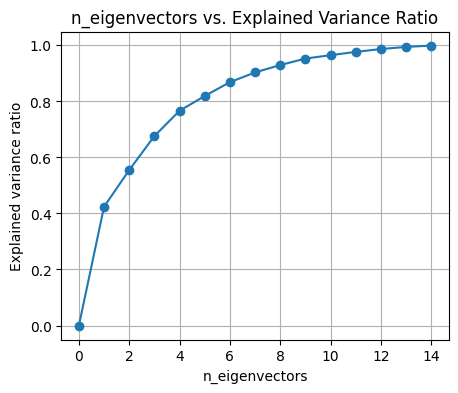

In [23]:
# plot the ratio of variance explained
var_ratio = []
for num in range(len(eigenvalues)):
  var_ratio.append(np.sum(sorted_eigenvalues[:num]) / np.sum(eigenvalues))

# plot explained variance for ratio
plt.figure(figsize=(5,4))
plt.grid()
plt.plot(range(len(eigenvalues)), var_ratio, marker='o')
plt.xlabel('n_eigenvectors')
plt.ylabel('Explained variance ratio')
plt.title('n_eigenvectors vs. Explained Variance Ratio')

#### From the table
- No.1 and No.2 eigenvectors are able to explain around 60% of the variance of data.
- Choosing top 5 eigenvectors, over 80% of the data variance can be explained.

#### Visualize eigenvectors

In [24]:
top5_eigenvector = df_eigenvectors.iloc[:, :5]
top5_eigenvector.index = X.columns

Text(0.5, 1.0, 'First eigenvector')

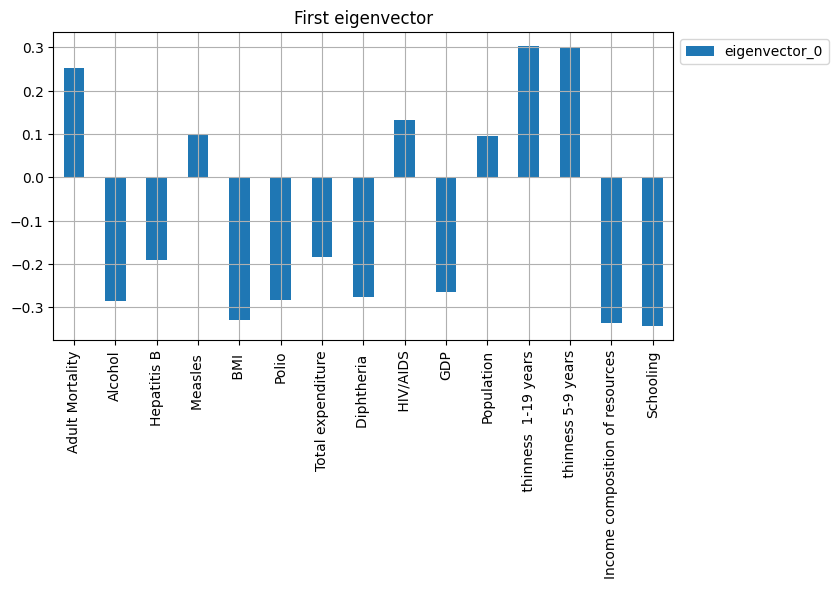

In [25]:
top5_eigenvector.iloc[:, 0].plot.bar(figsize=(8,4), grid="True").legend(bbox_to_anchor=(1.0, 1.0))
plt.title("First eigenvector")

##### First eigenvector
- This bar chart has been constructed to illustrate the values of the first eigenvector's components in conjunction with their respective feature labels.

- A clear dominant feature for the representation of this vector is not evident; however, a robust correlation exists among multiple features. Notably, features such as 'Alcohol', 'BMI,' 'GDP', 'Income,' and 'Schooling' exhibit positive correlations, whereas 'Adult Mortality' and 'thinness' are negatively correlated to these aforementioned features.

- Based on the absolute magnitudes of its constituent elements, this vector may be considered a viable indicator of the wealthiness in each country. The vector's negative direction suggests a more advanced stage of affluence.


Text(0.5, 1.0, 'Second eigenvector')

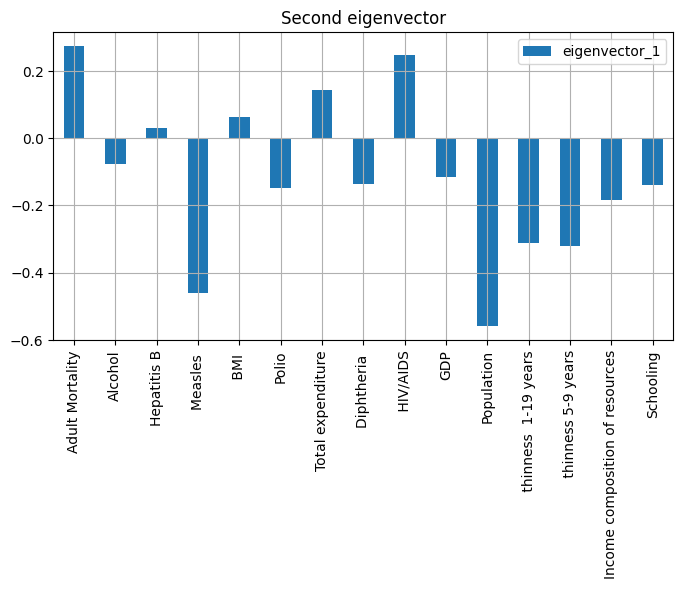

In [26]:
top5_eigenvector.iloc[:, 1].plot.bar(figsize=(8,4), grid="True").legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Second eigenvector")

##### Second eigenvector
- Two distinct features, specifically 'Measles' and 'Population,' exert a considerable influence on the direction of variance associated with this vector.

- Furthermore, owing to the positive correlations observed between 'Population' and 'Measles,' coupled with the absence of correlations between 'Population' and other diseases such as 'Polio,' 'Diphtheria,' and 'Hepatitis B,' it is possible to infer that the immunization coverage for 'Measles' is comparatively lower than that for the aforementioned diseases across the world.

- Furthermore, it is noteworthy that a positive correlation is visible between 'Population' and 'thinness.' This correlation implies that this vector encapsulates a composite representation of both the population and poverty levels within each country. It is essential to emphasize that the vector's direction dictates that smaller values correspond to higher population and greater poverty.

Text(0.5, 1.0, 'Third eigenvector')

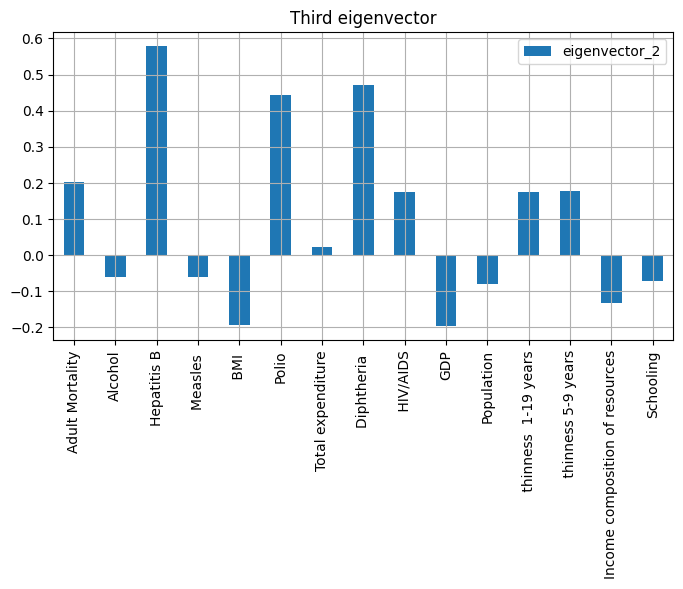

In [27]:
top5_eigenvector.iloc[:, 2].plot.bar(figsize=(8,4), grid="True").legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Third eigenvector")

##### Third eigenvector
- Three features relating to the diseases 'Polio,' 'Diphtheria,' and 'Hepatitis B' significantly contribute to the vector's direction of variance.

- Moreover, 'Polio,' 'Diphtheria,' and 'Hepatitis B' exhibit a strong positive correlation among themselves, while intriguingly, they demonstrate no correlation with 'Measles.' This observation suggests a potential government tendency towards prioritizing vaccination efforts for the former three diseases.

- Consequently, it is reasonable to infer that this vector serves as an indicator of the government's commitment to healthcare investment and its proactive approach in combating health-related issues.

Text(0.5, 1.0, '4th eigenvector')

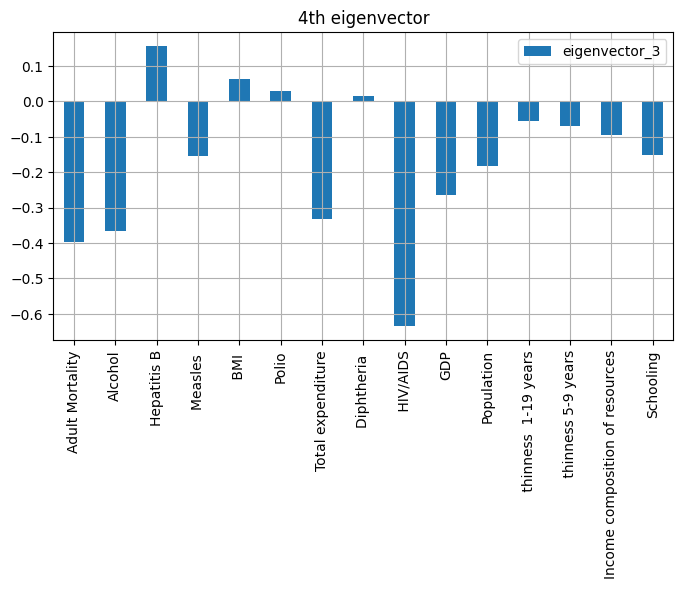

In [28]:
top5_eigenvector.iloc[:, 3].plot.bar(figsize=(8,4), grid="True").legend(bbox_to_anchor=(1.0, 1.0))
plt.title("4th eigenvector")

##### 4th eigenvector
- Five features 'Adult Mortality', 'Alcohol', 'Total expenditure', 'GDP' and 'HIV/AIDS' significantly contribute to decide the eigenvector's direction.

- They are highly positively correlated with each other. This observation suggests that 'Adult mortality' has a stronger connection with 'Alcohol' and 'HIV/AIDS' than other diseases. This vector can be assumed as an indicator of Adult fatality.

Text(0.5, 1.0, '5th eigenvector')

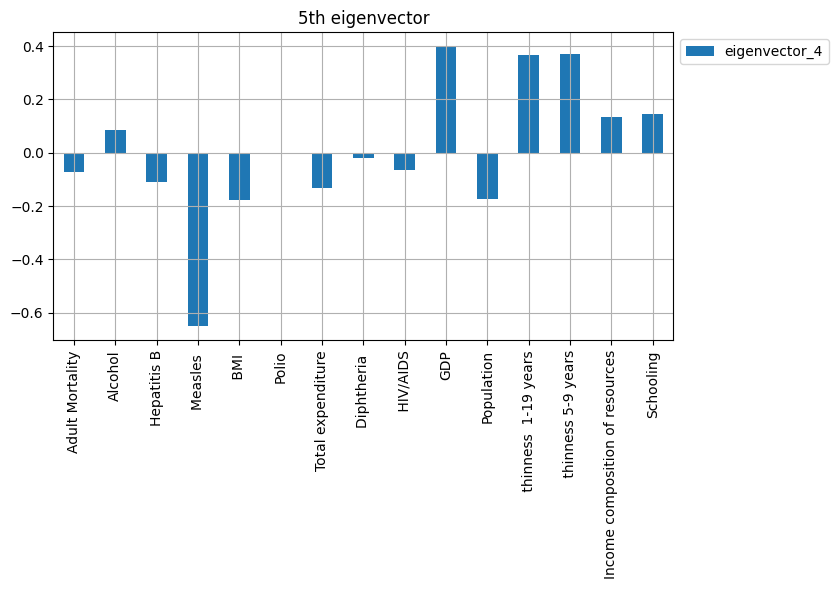

In [29]:
# @title
top5_eigenvector.iloc[:, 4].plot.bar(figsize=(8,4), grid="True").legend(bbox_to_anchor=(1.0, 1.0))
plt.title("5th eigenvector")

##### 5th eigenvector

- While 'Measles' emerges as the primary feature associated with this component, it is challenging to definitively assert that this feature predominantly drives the variance in the data, especially when considering its eigenvalue is small.

### Let's visualize the data points projections onto the 2D plane defined by two eigenvectors

In [30]:
# Project original data points with top5 eigenvectors
X_transform = np.matmul(X_, sorted_eigenvectors[:, :5])

In [31]:
# Make a dataframe for projected results
PCA_result = pd.DataFrame(X_transform, columns=["1st composition", "2nd composition", "3rd composition", "4th composition", "5th composition"])
PCA_result.index = data_mean_by_country_only_continuous.index
PCA_result = pd.concat([PCA_result, data_mean_by_country_only_continuous], axis=1)

In [32]:
PCA_result.head()

,1st composition,2nd composition,3rd composition,4th composition,5th composition,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Child mortality,Life expectancy cat,Child mortality cat
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.507331,-0.184192,-0.483425,-0.278130,1.333847,58.193750,269.062500,78.250000,0.014375,64.562500,...,0.10,340.015425,9.972260e+06,16.581250,15.581250,0.415375,8.212500,185.812500,0,1
Albania,-2.102445,0.057290,0.898332,1.202441,-0.589329,75.156250,45.062500,0.687500,4.848750,98.000000,...,0.10,2119.726679,6.969116e+05,1.618750,1.700000,0.709875,12.137500,1.625000,3,0
Algeria,-0.613811,-0.694186,0.347671,1.086409,0.187762,74.209091,102.818182,20.272727,0.447273,76.454545,...,0.10,3261.289374,2.412474e+07,6.000000,5.890909,0.707182,13.163636,43.636364,2,0
Angola,2.615779,0.118302,0.029303,-0.723637,0.551314,50.675000,362.750000,76.625000,7.620000,71.000000,...,2.45,2935.762962,1.010785e+07,9.037500,8.925000,0.492875,9.475000,195.375000,0,1
Argentina,-2.953295,-0.230366,-0.285359,-0.056981,-0.212633,75.238462,100.384615,10.000000,8.004615,80.307692,...,0.10,6932.546882,2.084745e+07,1.061538,0.930769,0.795769,16.630769,21.230769,3,0


In [33]:
import plotly.express as px

In [34]:
fig = px.scatter(PCA_result, x = "1st composition", y = "2nd composition",
                 color="Life expectancy cat",
                 symbol="Life expectancy cat",
                 hover_name=PCA_result.index,
                 hover_data=["Life expectancy ", "infant deaths", "Population", "Adult Mortality"],
                 title="Life expectancy",
                 width=800, height=600)
# fig.update_layout(legend=dict(y=0.5))
fig.add_annotation(x=-2.39, y=-0.487,
            text="Russia Federation",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=-2.39, y=0.189,
            text="Belarus",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=6.643, y=-11.99,
            text="India",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=0.557, y=-1.46,
            text="Maldives",
            showarrow=True,
            arrowhead=1)
fig.update_coloraxes(showscale=False)
newnames = {'3':'Over 75', '2': 'Between 70 and 75', '1':'Between 60 and 70', '0':'Under 60'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

#### Scatter plot 1 (1st vs 2nd composition) - Life expectancy
- The figure plots the distribution of projection of data points onto a 2D plane defined by 1st and 2nd compositions. Each data points represent countries. It is easy to confirm 'India' shows a extreme case in the dataset.
- Life expectancy is apparantly distributed along the direction of 1st composition vector. Besides, from the insight of 1st eigenvector, this vector can be considered as a index for the wealth of the country in a negative direction. This implies the countries appeared in the left side are more developing than those in the right. Hence, it is reasonable to understand that there is a tendency that countires with longer life expectancy clustered in the left side.
- Moreover, when examining the data from the perspective of the 2nd composition, it becomes evident that groups with longer life expectancies occupy a lower area in comparison to those with shorter life expectancies. This is reasonable when considering the second composition explains the population and poverty level.
- It is also worth noting that, despite their relative wealth, certain countries exhibit shorter life expectancies. For instance, both the "Russian Federation" and "Belarus" report life expectancies ranging from 65 to 70, notably lower than countries of similar economic standing. In contrast, "Maldives" attains a longer life expectancy, even though its level of development is comparatively lower.

In [35]:
fig = px.scatter(PCA_result, x = "1st composition", y = "2nd composition",
                 color="Child mortality cat",
                 size="Child mortality",
                 title="Child mortality",
                #  symbol="under-five deaths cat",
                 hover_name=PCA_result.index,
                 hover_data=["infant deaths", "under-five deaths ", "Schooling", "Total expenditure", ' HIV/AIDS'],
                 width=800, height=600)
fig.add_annotation(x=-2.134, y=-0.874,
            text="Brazil",
            showarrow=True,
            arrowhead=1)
fig.add_annotation(x=-1.958, y=-0.071,
            text="Mexico",
            showarrow=True,
            arrowhead=1)
fig.add_vline(x=0.5, line_width=3, line_dash="dash", line_color="green")
fig.add_vrect(x0=0.5, x1=8, line_width=0, fillcolor="red", opacity=0.05)
fig.update_traces(marker_sizemin=2, selector=dict(type='scatter'))
fig.show()

#### Scatter plot 2 (1st vs 2nd composition) - Child mortality

- This figure plots the child mortality into two categories, maintaining the same composition as the preceding graph. In this visualization, data points colored in yellow denote countries characterized by high rates of infant and under-five mortality, with the size of each data point reflecting the magnitude of such occurrences.

- Utilizing the same compositions, the first vector represents economic wealth, whereas the second vector signifies parameters related to population size and poverty. It is evident that nations characterized by higher child mortality rates tend to cluster towards the lower-right area of the graph. This observation suggests a notable correlation between the incidence of child mortality and the variables represented by these two compositional attributes.

- Additionally, a specific threshold can be set with respect to the first composition, exemplified by the green dashed line, with a threshold value of 0.5. It is readily apparent that a significant majority of countries exhibiting high child mortality rates reside within the right-hand portion of the graph. By excluding nations located in the left-hand domain, a comparative analysis can be conducted between high child mortality countries and those with lower rates, offering insights into the factors influencing child mortality, even within developing nations.

- Aside from that, it is evident that 'Brazil' and 'Mexico' stand out due to its relatively high child mortality despite their levels of economic wealth.

In [36]:
fig = px.scatter(PCA_result, x = "1st composition", y = "4th composition",
                 color="Life expectancy cat",
                 symbol="Life expectancy cat",
                 size=" HIV/AIDS",
                 title="Adult Mortality",
                 hover_name=PCA_result.index,
                 hover_data=[" HIV/AIDS", "Alcohol"],
                 width=800, height=600)
# fig.update_layout(legend=dict(y=0.5))
fig.update_traces(marker_sizemin=2, selector=dict(type='scatter'))
fig.update_coloraxes(showscale=False)
newnames = {'3':'Over 75', '2': 'Between 70 and 75', '1':'Between 60 and 70', '0':'Under 60'} # From the other post
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))
fig.show()

#### Scatter plot 3 (1st vs 4th composition) - Life expectancy

- This figure plots the Life expectancy of countries into four categories with 1st and 4th compositions. The visualization employs varied colors and markings to differentiate data points according to their respective categories, with the size of each data point serving as a visual indicator of the magnitude of the "HIV/AIDS" feature.

- The distribution reveals a conspicuous surge in the prevalence of HIV/AIDS within the lowest life expectancy category, a phenomenon observable primarily in the bottom-right quadrant. This observation suggests that numerous developing nations are struggling with the formidable challenge posed by HIV, potentially contributing to a reduction in life expectancy.

- In light of these findings, it is conceivable to propose that governmental entities consider advocating for a strategically weighted investment in initiatives aimed at curtailing the proliferation of HIV.

# Summary

- I conducted Principal Component Analysis (PCA) on global health and demographics data to extract meaningful insights for "Life expectancy" and "Child mortality".

- The top 5 eigenvectors contribute to approximately 80% of the data variability. Specifically, the first eigenvector alone accounts for over 40% of the data variability, serving as a significant indicator of a country's wealth.

- There exists a notable correlation between life expectancy and the wealth magnitude of each country, reinforcing the premise that economic indicators are closely associated with health outcomes.

- Observations indicate a discernible increase in child mortality when a country surpasses a certain poverty threshold. Additionally, even among economically disadvantaged nations, there are apparent disparities in child fatality rates, potentially providing valuable insights to mitigate such occurrences.

- Furthermore, the "HIV/AIDS" feature exhibits a surge in countries categorized with low life expectancy, underscoring the linkage between health crises and life expectancy disparities in these regions.


